# Exercise 03

In [23]:
import glob
import pandas as pd
import seaborn as sns
from nltk.tokenize import word_tokenize
import nltk
#nltk.download('punkt_tab')

In [24]:
def read_files(file_list):
    file_dict = {}
    for f in file_list:
        with open(f, "r") as fo:
            if "1400-1499" in f:
                if 1400 in file_dict:
                    file_dict[1400].extend(word_tokenize(fo.read()))
                else:
                    file_dict[1400] = word_tokenize(fo.read())
            elif "1500-1599" in f:
                if 1500 in file_dict:
                    file_dict[1500].extend(word_tokenize(fo.read()))
                else:
                    file_dict[1500] = word_tokenize(fo.read())
    return file_dict         

In [25]:
file_dict = read_files(list(glob.iglob("dta/**/*.txt", recursive=True)))

In [26]:
df = pd.DataFrame(pd.Series(file_dict).explode().reset_index().rename(columns={"index": "century", 0: "token"}))
print(df)

         century    token
0           1400     Nach
1           1400   cristi
2           1400   gepurt
3           1400        .
4           1400  Tausent
...          ...      ...
4668712     1500   willen
4668713     1500     Amen
4668714     1500        .
4668715     1500     ENDE
4668716     1500        .

[4668717 rows x 2 columns]


# TTR

Number of types

In [27]:
df.drop_duplicates().groupby("century").size()

century
1400     17071
1500    194468
dtype: int64

Number of tokens

In [28]:
df.groupby("century").size()

century
1400     125874
1500    4542843
dtype: int64

In [29]:
df.drop_duplicates().groupby("century").size() / df.groupby("century").size()

century
1400    0.135620
1500    0.042808
dtype: float64

# Absolute vs. Relative Counts

In [8]:
df_counts = df.groupby("century").value_counts().reset_index()
df_counts.groupby("century").head(15)
df_counts.loc[df_counts["century"]==1400,"count"]/125874125874

century  token   count
0         1400    vnd    5467
1         1400      .    4539
2         1400      ,    4046
3         1400      /    3069
4         1400    der    2900
5         1400    das    2520
6         1400     in    1966
7         1400    ist    1881
8         1400    die    1713
9         1400    ein    1254
10        1400     so    1244
11        1400    dem    1236
12        1400    den    1191
13        1400    von    1125
14        1400    mit     984
17071     1500      /  357706
17072     1500      .  171670
17073     1500    vnd  144385
17074     1500    der   90033
17075     1500    die   83328
17076     1500    das   73522
17077     1500     in   48453
17078     1500  nicht   36944
17079     1500    den   35391
17080     1500   auch   34452
17081     1500    ist   34100
17082     1500    mit   33691
17083     1500   vnnd   32741
17084     1500     er   32251
17085     1500    von   31984

In [9]:
df_counts_norm = df.groupby("century").value_counts(normalize=True).reset_index()
df_counts_norm.groupby("century").head(15)

century  token  proportion
0         1400    vnd    0.043432
1         1400      .    0.036060
2         1400      ,    0.032143
3         1400      /    0.024382
4         1400    der    0.023039
5         1400    das    0.020020
6         1400     in    0.015619
7         1400    ist    0.014944
8         1400    die    0.013609
9         1400    ein    0.009962
10        1400     so    0.009883
11        1400    dem    0.009819
12        1400    den    0.009462
13        1400    von    0.008938
14        1400    mit    0.007817
17071     1500      /    0.078741
17072     1500      .    0.037789
17073     1500    vnd    0.031783
17074     1500    der    0.019819
17075     1500    die    0.018343
17076     1500    das    0.016184
17077     1500     in    0.010666
17078     1500  nicht    0.008132
17079     1500    den    0.007790
17080     1500   auch    0.007584
17081     1500    ist    0.007506
17082     1500    mit    0.007416
17083     1500   vnnd    0.007207
17084     1500     er    0.007099
17085     1500    von    0.007041

## Difference between absolute and relative counts

Judging by the absolute counts alone, the topic of family became much more less common in 1500, but looking at the relative counts, this effect turns around and we can now see that relative to the text lengths, the family topic is much more prevelant in the 1400 corpus compared to the 1500 corpus

In [10]:
df_counts[(df_counts["token"] == "kind") | (df_counts["token"] == "mutter") | (df_counts["token"] == "vater")]

century   token  count
122       1400    kind    109
821       1400   vater     16
1424      1400  mutter      9
18254     1500    kind    361
18778     1500   vater    234
20819     1500  mutter     96

In [11]:
df_counts_norm[(df_counts_norm["token"] == "kind") | (df_counts_norm["token"] == "mutter") | (df_counts_norm["token"] == "vater")]

century   token  proportion
122       1400    kind    0.000866
825       1400   vater    0.000127
1312      1400  mutter    0.000072
18255     1500    kind    0.000079
18774     1500   vater    0.000052
20825     1500  mutter    0.000021

## Spelling differences

Spelling differences can interfer with both absolute and relative counts, since differences between the centuries point more toward a difference in spelling preference than a preference for using the word itself more or less frequently (a solution for this problem can be lemmatization)

In [12]:
df_counts[(df_counts["token"] == "gott") | (df_counts["token"] == "Gott")]

century token  count
420       1400  gott     31
6498      1400  Gott      2
17100     1500  Gott  14133
20715     1500  gott     99

In [13]:
df_counts_norm[(df_counts_norm["token"] == "gott") | (df_counts_norm["token"] == "Gott")]

century token  proportion
415       1400  gott    0.000246
4708      1400  Gott    0.000016
17100     1500  Gott    0.003111
20731     1500  gott    0.000022

# Zipf's Law

<Axes: xlabel='rank', ylabel='count'>

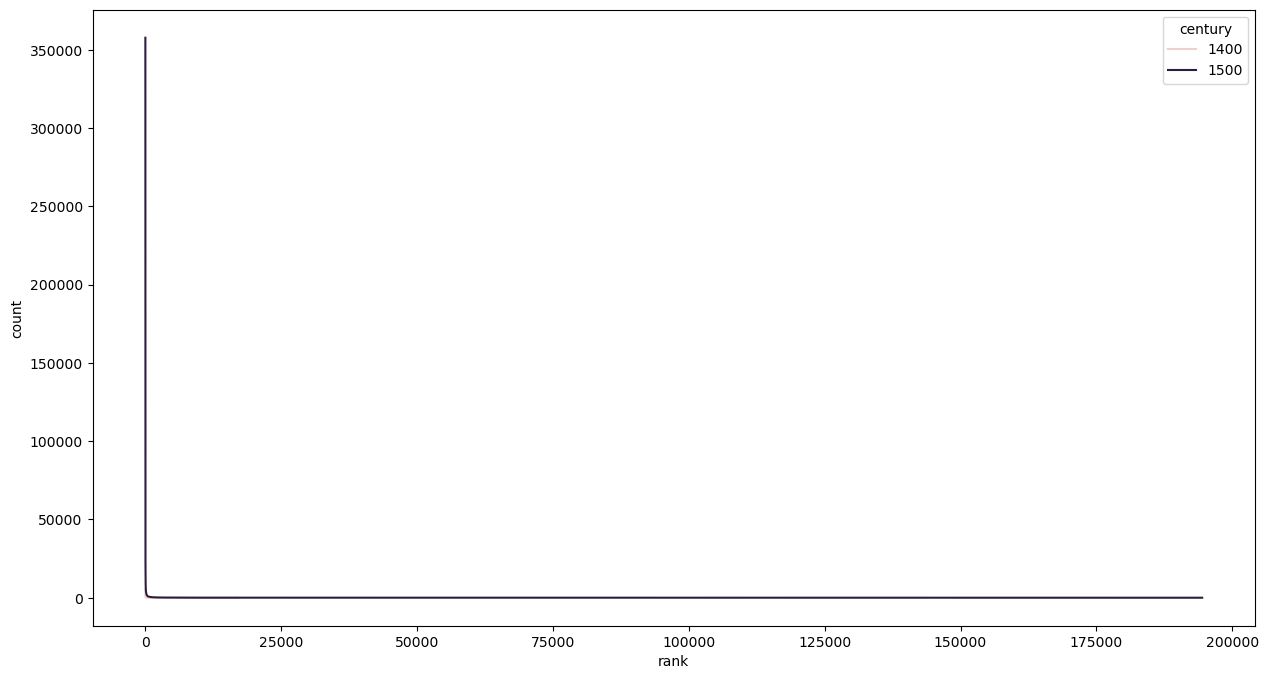

In [14]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,8))
df_zipf = df.groupby("century").value_counts().reset_index()
df_zipf["rank"] = df_zipf.groupby("century").cumcount()+1
sns.lineplot(data=df_zipf, x = "rank", y = "count", hue = "century")

In [15]:
df_zipf

century       token  count    rank
0          1400         vnd   5467       1
1          1400           .   4539       2
2          1400           ,   4046       3
3          1400           /   3069       4
4          1400         der   2900       5
...         ...         ...    ...     ...
211534     1500     συμϕορὰ      1  194464
211535     1500  συμϖάϑειαν      1  194465
211536     1500  δυσκρασίαν      1  194466
211537     1500     εἰδέναι      1  194467
211538     1500         καὶ      1  194468

[211539 rows x 4 columns]

## Need to limit number of ranks in order to observe trend in the plot

<Axes: xlabel='rank', ylabel='count'>

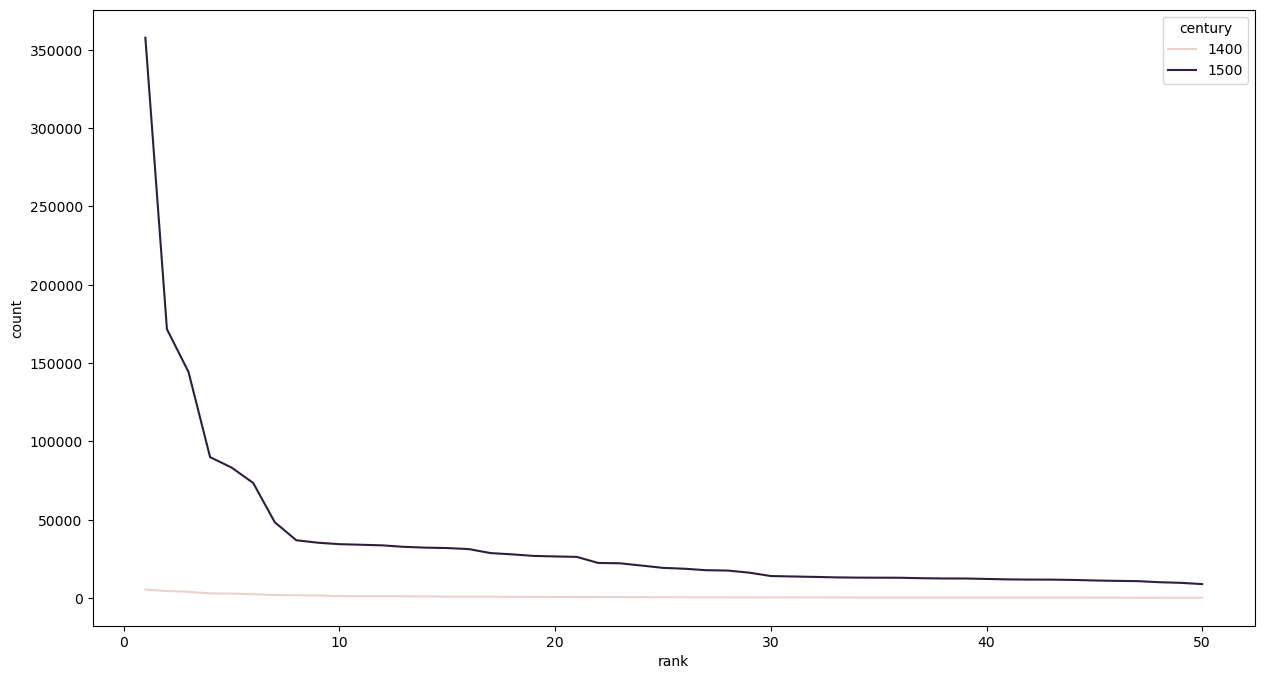

In [16]:
plt.figure(figsize=(15,8))
df_zipf = df.groupby("century").value_counts().reset_index()
df_zipf["rank"] = df_zipf.groupby("century").cumcount()+1
df_zipf = df_zipf.groupby("century").head(50)
sns.lineplot(data=df_zipf, x = "rank", y = "count", hue = "century")

## Counts need to be normalized to be comparable across the centuries

<Axes: xlabel='rank', ylabel='proportion'>

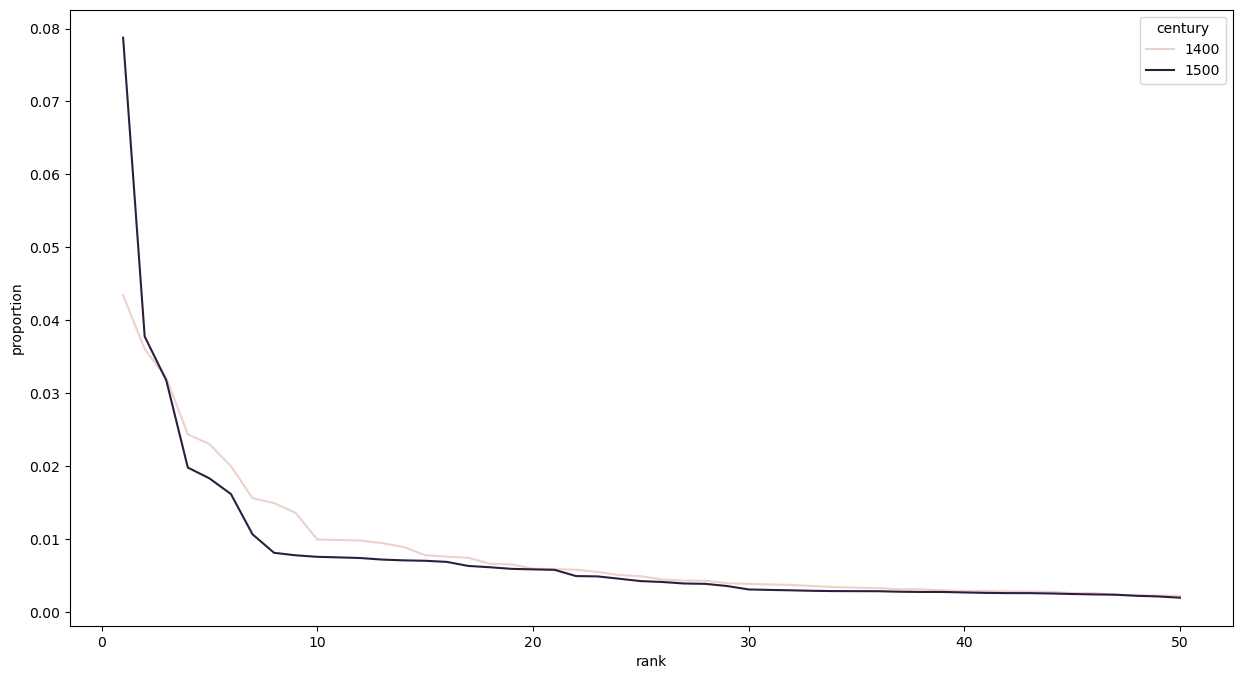

In [17]:
plt.figure(figsize=(15,8))
df_zipf = df.groupby("century").value_counts(normalize=True).reset_index()
df_zipf["rank"] = df_zipf.groupby("century").cumcount()+1
df_zipf = df_zipf.groupby("century").head(50)
sns.lineplot(data=df_zipf, x = "rank", y = "proportion", hue = "century")

## Zipf's Law only holds after a certain threshold for the corpus size

<Axes: xlabel='rank', ylabel='proportion'>

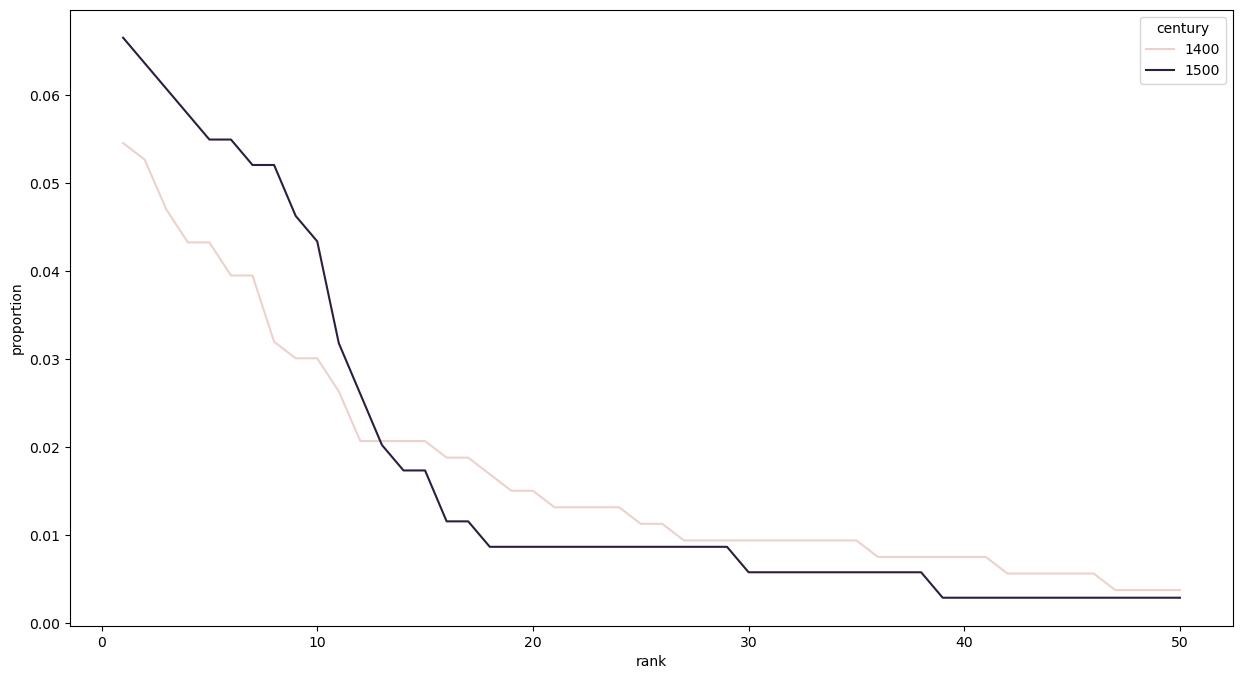

In [18]:
plt.figure(figsize=(15,8))
mini_file_dict = read_files(["dta/1400-1499/nn_almanach05_1473.txt", "dta/1500-1599/rechnungsbuch01_1500.txt"])
mini_df = pd.DataFrame(pd.Series(mini_file_dict).explode().reset_index().rename(columns={"index": "century", 0: "token"}))
mini_df_zipf = mini_df.groupby("century").value_counts(normalize=True).reset_index()
mini_df_zipf["rank"] = mini_df_zipf.groupby("century").cumcount()+1
mini_df_zipf = mini_df_zipf.groupby("century").head(50)
sns.lineplot(data=mini_df_zipf, x = "rank", y = "proportion", hue = "century")

# Bonus: STTR

In [19]:
window_size = 1000
df_1400 = df[df["century"] == 1400]
df_1500 = df[df["century"] == 1500]
df_1400["windows"] = pd.cut(df_1400.index+1, range(0, df_1400.index.max() + window_size, window_size))
df_1500["windows"] = pd.cut(df_1500.index+1, range(0, df_1500.index.max() + window_size, window_size))
token_count_1400 = df_1400.groupby(["century", "windows"], observed=True).size().reset_index()
token_count_1500 = df_1500.groupby(["century", "windows"], observed=True).size().reset_index()
type_count_1400 = df_1400.drop_duplicates().groupby(["century", "windows"], observed=True).size().reset_index()
type_count_1500 = df_1500.drop_duplicates().groupby(["century", "windows"], observed=True).size().reset_index()

/tmp/ipykernel_15135/696829287.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1400["windows"] = pd.cut(df_1400.index+1, range(0, df_1400.index.max() + window_size, window_size))
/tmp/ipykernel_15135/696829287.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1500["windows"] = pd.cut(df_1500.index+1, range(0, df_1500.index.max() + window_size, window_size))


In [20]:
df_1400

century      token           windows
0          1400       Nach         (0, 1000]
1          1400     cristi         (0, 1000]
2          1400     gepurt         (0, 1000]
3          1400          .         (0, 1000]
4          1400    Tausent         (0, 1000]
...         ...        ...               ...
125869     1400       Anno  (125000, 126000]
125870     1400         rc  (125000, 126000]
125871     1400          .  (125000, 126000]
125872     1400  lxxxxiiij  (125000, 126000]
125873     1400          .  (125000, 126000]

[125874 rows x 3 columns]

In [21]:
(type_count_1400[0] / token_count_1400[0]).mean()

0.40213285024154594

In [22]:
(type_count_1500[0] / token_count_1500[0]).mean()

0.44504940111087254

Compared to not-standardized TTR:

| century | |
| ---- | ---- |
| 1400  |  0.135620 |
| 1500  |  0.042808 |